# VIZ for statistical comparison of errors 

(for neatnet+buildings)

In [1]:
import os
import warnings

import geopandas as gpd
import matplotlib.pyplot as plt
import momepy as mm
import numpy as np
import pandas as pd
import scipy.stats

from core import stats, utils

In [2]:
methods_to_compare = [
    "original",
    # "cityseer",
    # "osmnx",
    # "parenx-voronoi",
    # "parenx-skeletonize",
    "neatnet",
    "neatnet-buildings",
]

cartobold = [
    "#bbbbbb",
    "#11A579",
    "#7F3C8D",
    "#E73F74",
    "#3969AC",
    "#F2B701",
    "#80BA5A",
    "#E68310",
    "#008695",
    "#CF1C90",
    "#f97b72",
    "#4b4b8f",
    "#A5AA99",
]

eval_vars = [
    "avg_degree",
    "coordinate_count",
    "edge_count",
    "edge_length",
    "stroke_count",
    "stroke_length_max",
    "stroke_length_sum",
]

Read in "combined" table from `statistical_comparison.ipynb`

In [3]:
combined = pd.read_csv("combined-buildings.csv")
combined = combined.set_index(["variable", "case"]).sort_index(level=0)
combined.head(3)

original   neatnet  neatnet-buildings
variable   case                                              
avg_degree Aleppo       0.682729  0.910745           0.912170
           Auckland     0.439375  0.803478           0.827448
           Bucaramanga  0.675186  0.911149           0.913228

Make dicts for plotting

In [4]:
cities = list(utils.city_fua.keys())
colors = dict(zip(methods_to_compare, cartobold, strict=False))
xpos = dict(zip(cities, range(len(cities)), strict=False))

In [5]:
colors

{'original': '#bbbbbb', 'neatnet': '#11A579', 'neatnet-buildings': '#7F3C8D'}

***

all in 1:

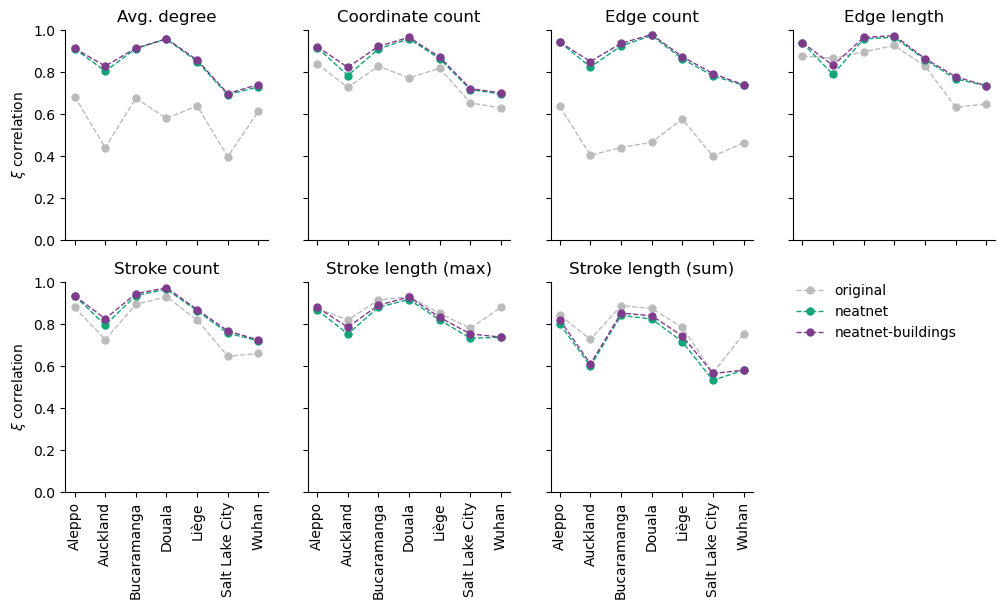

In [6]:
title_mapping = {
    "avg_degree": "Avg. degree",
    "coordinate_count": "Coordinate count",
    "edge_count": "Edge count",
    "edge_length": "Edge length",
    "stroke_count": "Stroke count",
    "stroke_length_max": "Stroke length (max)",
    "stroke_length_sum": "Stroke length (sum)",
}

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12, 6))

for i, metric in enumerate(eval_vars):
    ax = axs.flat[i]

    for method in methods_to_compare:
        ax.plot(
            combined.loc[metric][method],
            color=colors[method],
            linewidth=1,
            linestyle="dashed",
            marker="o",
            markersize=5,
            label=method,
        )
    ax.set_ylim(0, 1)
    if i == 6:
        ax.legend(loc="upper left", bbox_to_anchor=(1.15, 1.05), frameon=False)
    if i in range(4, 7):
        ax.set_xticks(list(xpos.values()))
        ax.set_xticklabels(list(xpos.keys()), rotation=90)
        # ax.set_xlabel("City")
    if i in [0, 4]:
        ax.set_ylabel(r"$\xi$ correlation")
    ax.set_title(title_mapping[metric])
    ax.spines[["right", "top"]].set_visible(False)
axs.flat[-1].remove()
plt.savefig(
    "../../evaluation-buildings/chi.png", dpi=300, transparent=True, bbox_inches="tight"
)

## Deltas

In [7]:
combined = pd.read_csv("combined_deltas-buildings.csv")
combined = combined.set_index(["variable", "case"]).sort_index(level=0)
combined.head(3)

original  neatnet  neatnet-buildings
variable   case                                             
avg_degree Aleppo          85.59    22.85              22.38
           Auckland        33.70    18.40              16.43
           Bucaramanga     65.62    15.97              16.15

Make dicts for plotting

In [8]:
cities = list(utils.city_fua.keys())
colors = dict(zip(methods_to_compare, cartobold, strict=False))
xpos = dict(zip(cities, range(len(cities)), strict=False))

***

all in 1:

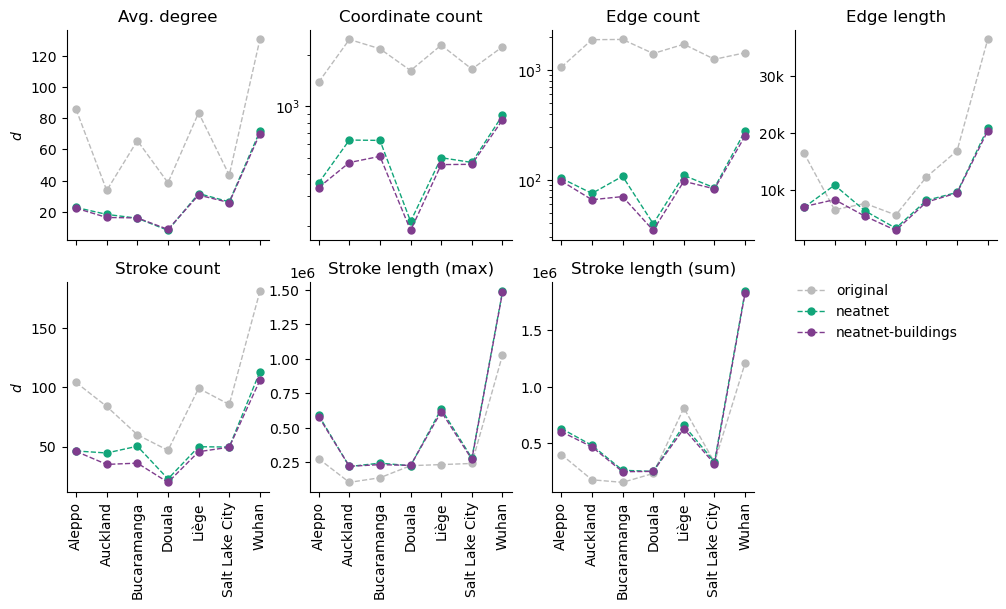

In [9]:
fig, axs = plt.subplots(2, 4, sharex=True, sharey=False, figsize=(12, 6))

for i, metric in enumerate(eval_vars):
    ax = axs.flat[i]
    if metric in ["coordinate_count", "edge_count"]:
        ax.set_yscale("log")

    if metric == "edge_length":
        ax.set_yticks([10000, 20000, 30000], labels=["10k", "20k", "30k"])

    if metric in ["stroke_length_max", "stroke_length_sum"]:
        ax.yaxis.offsetText.set_position((-0.1, 0))

    for method in methods_to_compare:
        ax.plot(
            combined.loc[metric][method],
            color=colors[method],
            linewidth=1,
            linestyle="dashed",
            marker="o",
            markersize=5,
            label=method,
        )
    # ax.set_ylim(0, 1)
    if i == 6:
        ax.legend(loc="upper left", bbox_to_anchor=(1.15, 1.05), frameon=False)
    if i in range(4, 7):
        ax.set_xticks(list(xpos.values()))
        ax.set_xticklabels(list(xpos.keys()), rotation=90)
        # ax.set_xlabel("City")
    if i in [0, 4]:
        ax.set_ylabel(r"$d$")
    ax.set_title(title_mapping[metric])
    ax.spines[["right", "top"]].set_visible(False)
axs.flat[-1].remove()
plt.savefig(
    "../../evaluation-buildings/delta.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)